In [1]:
from skimage.io import imread, imsave

In [2]:
file_path = '/home/jiongyi/Documents/johnny/ForDriftCorrection.tif'

In [3]:
mm_stack = imread(file_path)

In [5]:
no_frames, no_rows, no_cols = mm_stack.shape

In [6]:
from skimage.io import imshow

In [10]:
from skimage.feature import register_translation
from skimage.feature.register_translation import _upsampled_dft

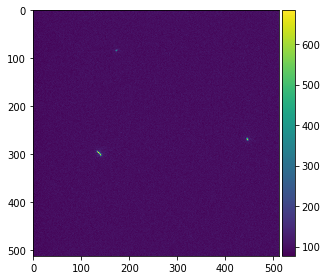

In [14]:
from scipy.ndimage import fourier_shift
import numpy as np

In [31]:
#Iterate to fix images.
from numpy import zeros
corrected_stack = zeros((no_frames, no_rows, no_cols))
corrected_stack[0, :, :] = mm_stack[0, :, :]
for i in range(0, no_frames - 1):
    i_shift,_ ,_ = register_translation(corrected_stack[i, :, :], mm_stack[i + 1, :, :], 100)
    i_corrected_dft = fourier_shift(np.fft.fftn(mm_stack[i + 1, :, :]), i_shift)
    corrected_stack[i + 1, :, :] = np.fft.ifftn(i_corrected_dft).real

In [37]:
from skimage.util import img_as_uint
imsave('/home/jiongyi/Documents/johnny/drift_corrected_stack.tif', img_as_uint(corrected_stack / (2**16 - 1)))

/home/jiongyi/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: /home/jiongyi/Documents/johnny/drift_corrected_stack.tif is a low contrast image
  
